## To test actual supercomputers
- Using actual supercomputers to test out the probabilities of correct outputs for randomized identity circuits 
- **NOTE**: NoiseModel needs not to be made as the testing is done on the actual quantum computers on the cloud and not in **qasm**

In [1]:
from qiskit import * 
import qiskit.ignis.verification.randomized_benchmarking as rb 
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ 
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import * 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
%matplotlib inline 

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
%qiskit_backend_overview

## Step 1
- Choose two quantum computers - **ibmq_lima** and **ibmq_santiago** this time 

In [3]:
quito = provider.get_backend('ibmq_quito')
belem = provider.get_backend('ibmq_belem')

In [4]:
print("Quito : ",quito.properties)
print("Belem : ",belem.properties)

Quito :  <bound method IBMQBackend.properties of <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>>
Belem :  <bound method IBMQBackend.properties of <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>>


## Step 2
- Create randomized circuits

In [5]:
# circuit lengths 
lengths = [1 , 3]

# trying a 3-qubit circuit 
pattern = [[0,1,2]]
rb_circs , _ = rb.randomized_benchmarking_seq(length_vector=lengths, rb_pattern=pattern)

- Testing out the circuit 

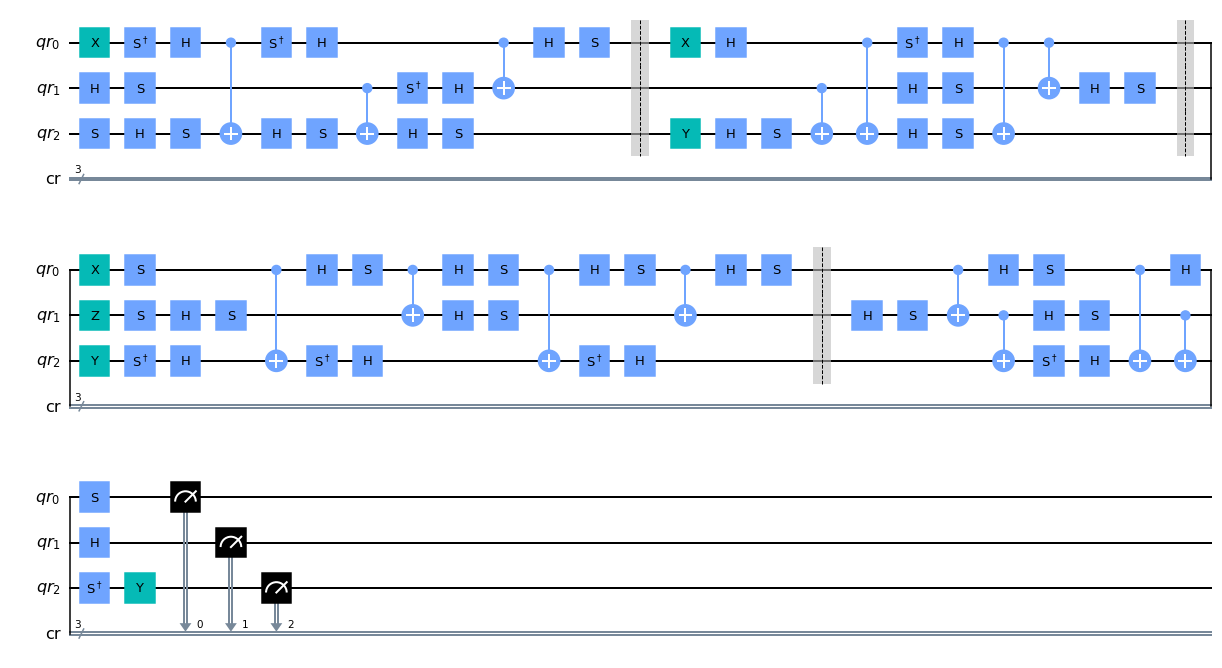

In [5]:
rb_circs[0][1].draw('mpl')

- Testing on qasm first : since it is an identity, it should return the original state with 100% probability

### Circuit 1

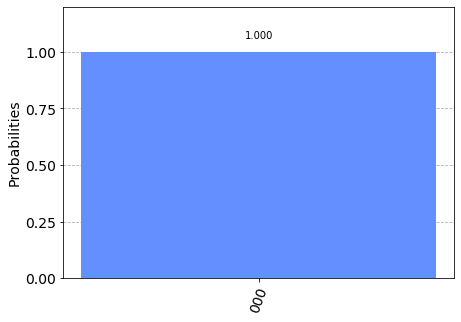

In [6]:
backend = Aer.get_backend('qasm_simulator')
shots = 2**16 

circ1 = rb_circs[0][0]

j1 = execute(circ1,backend=backend,shots = shots)
res1 = j1.result()
c1 = res1.get_counts()
plot_histogram(c1)

### Circuit 2

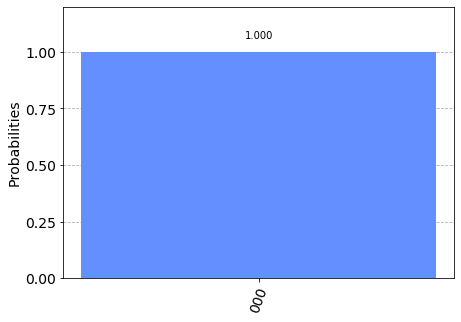

In [7]:
backend = Aer.get_backend('qasm_simulator')
shots = 2**16 

circ2 = rb_circs[0][1]

j2 = execute(circ2,backend=backend,shots = shots)
res2 = j2.result()
c2 = res2.get_counts()
plot_histogram(c2)

- Circuits work, moving to actual hardware

In [6]:
shots = 2**12
circ1 = rb_circs[0][0]
circ2 = rb_circs[0][1]

### IBM Quito
- First transpile according to the backend
- Then convert to quantum assembly language
- After that, run

In [7]:
t1 = transpile(circ1,backend=quito)
assembled1 = assemble(t1,
                     backend=quito,
                     shots = shots)
job1 = quito.run(assembled1)
job_monitor(job1)

Job Status: job has successfully run


In [9]:
t2 = transpile(circ2,backend=quito)
assembled2 = assemble(t2,
                     backend=quito,
                     shots = shots)
job2 = quito.run(assembled2)
job_monitor(job2)

Job Status: job has successfully run


Circuit 1 : Quito 


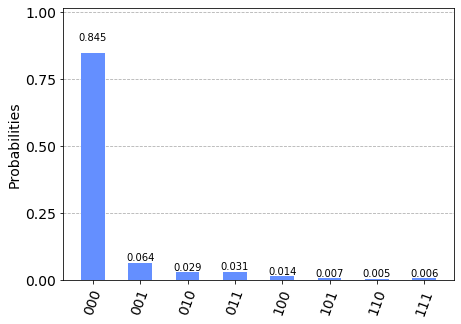

Circuit 2 : Quito 


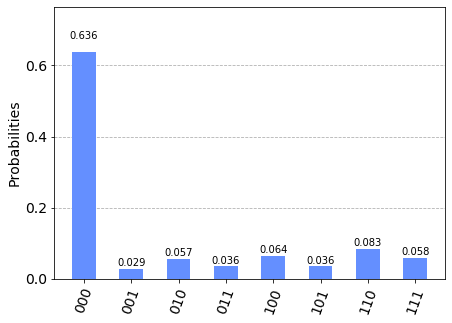

In [10]:
c1 = job1.result().get_counts()
c2 = job2.result().get_counts()

print("Circuit 1 : Quito ")
display(plot_histogram(c1))
print("Circuit 2 : Quito ")
display(plot_histogram(c2))


### IBM Belem

In [12]:
t1_s = transpile(circ1,backend=belem)
assembled1_s = assemble(t1,
                     backend=belem,
                     shots = shots)
job1_s = belem.run(assembled1_s)
job_monitor(job1_s)

Job Status: job has successfully run


In [13]:
t2_s = transpile(circ2,backend=belem)
assembled2_s = assemble(t2_s,
                     backend=belem,
                     shots = shots)
job2_s = belem.run(assembled2_s)
job_monitor(job2_s)

Job Status: job has successfully run


Circuit 1 : Belem 


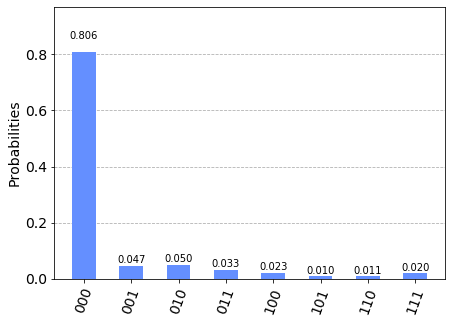

Circuit 2 : Belem 


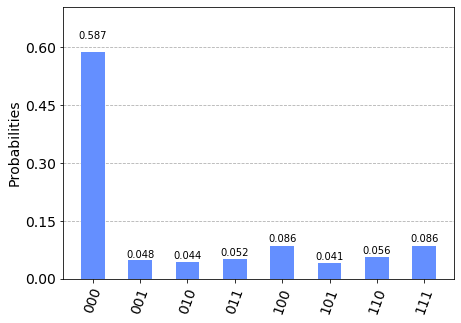

In [14]:
c1_s=  job1_s.result().get_counts()
c2_s=  job2_s.result().get_counts()

print("Circuit 1 : Belem ")
display(plot_histogram(c1_s))
print("Circuit 2 : Belem ")
display(plot_histogram(c2_s))


## Comparing results

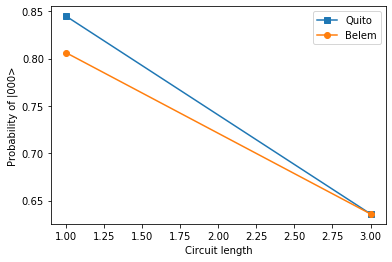

In [16]:
plt.plot(lengths, [c1['000']/shots,c2['000']/shots],label = 'Quito',marker='s')
plt.plot(lengths, [c1_s['000']/shots,c2['000']/shots] , label = 'Belem', marker = 'o')
plt.legend()
plt.xlabel("Circuit length")
plt.ylabel("Probability of |000>")
plt.show()



- This highlights the fact that the errors actually increase as the length of circuit increases.